<a href="https://colab.research.google.com/github/sharanbalu/ML-Algorithms-assingment/blob/main/Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


**Importing the dataset**

In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
del df['User ID']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
df['Gender']= le.fit_transform(df['Gender'])
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [ ]:
X=df[['Age','EstimatedSalary','Gender']].values
y=df["Purchased"].values

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2 , random_state=0)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()
scaled.fit(X_train)
scaled_data=scaled.transform(X_train)

**Fitting Decision Tree Classification to the Training set**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier()

**Predicting the Test set results**

In [ ]:
y_pred= dt.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1])

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score
cm= confusion_matrix(y_test,y_pred)
cm

array([[52,  6],
       [ 2, 20]])

In [ ]:
roc= roc_auc_score(y_test,y_pred)
roc

0.9028213166144201

In [ ]:
f1=f1_score(y_test,y_pred)
f1

0.8333333333333333

**REDUCING THE OVERFIT OF MODEL BY SEETING THE MAX DEPTH OF TREE IS 4**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred= dt.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score
cm= confusion_matrix(y_test,y_pred)
cm

array([[55,  3],
       [ 1, 21]])

In [ ]:
roc= roc_auc_score(y_test,y_pred)
roc

0.95141065830721

**DUE SET OF MAX DEPTH OF TREE THE ROC SCORE HAS INCREASED**

**Visualising the Training set results**

[Text(0.5, 0.875, 'X[0] <= 44.5\ngini = 0.47\nsamples = 320\nvalue = [199, 121]'),
 Text(0.25, 0.625, 'X[1] <= 90500.0\ngini = 0.311\nsamples = 228\nvalue = [184, 44]'),
 Text(0.125, 0.375, 'X[0] <= 36.5\ngini = 0.082\nsamples = 186\nvalue = [178, 8]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 120\nvalue = [120, 0]'),
 Text(0.1875, 0.125, 'gini = 0.213\nsamples = 66\nvalue = [58, 8]'),
 Text(0.375, 0.375, 'X[0] <= 26.5\ngini = 0.245\nsamples = 42\nvalue = [6, 36]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4375, 0.125, 'gini = 0.214\nsamples = 41\nvalue = [5, 36]'),
 Text(0.75, 0.625, 'X[1] <= 41500.0\ngini = 0.273\nsamples = 92\nvalue = [15, 77]'),
 Text(0.625, 0.375, 'X[1] <= 22500.0\ngini = 0.059\nsamples = 33\nvalue = [1, 32]'),
 Text(0.5625, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 28\nvalue = [0, 28]'),
 Text(0.875, 0.375, 'X[1] <= 85500.0\ngini = 0.362\nsamples = 59\nvalue = [14, 45]'),
 Te

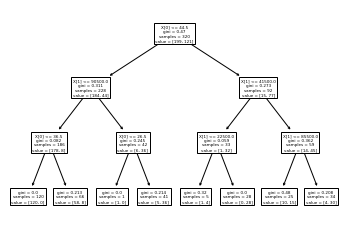

In [ ]:
from sklearn import tree
tree.plot_tree(dt)

**Visualising the Test set results**

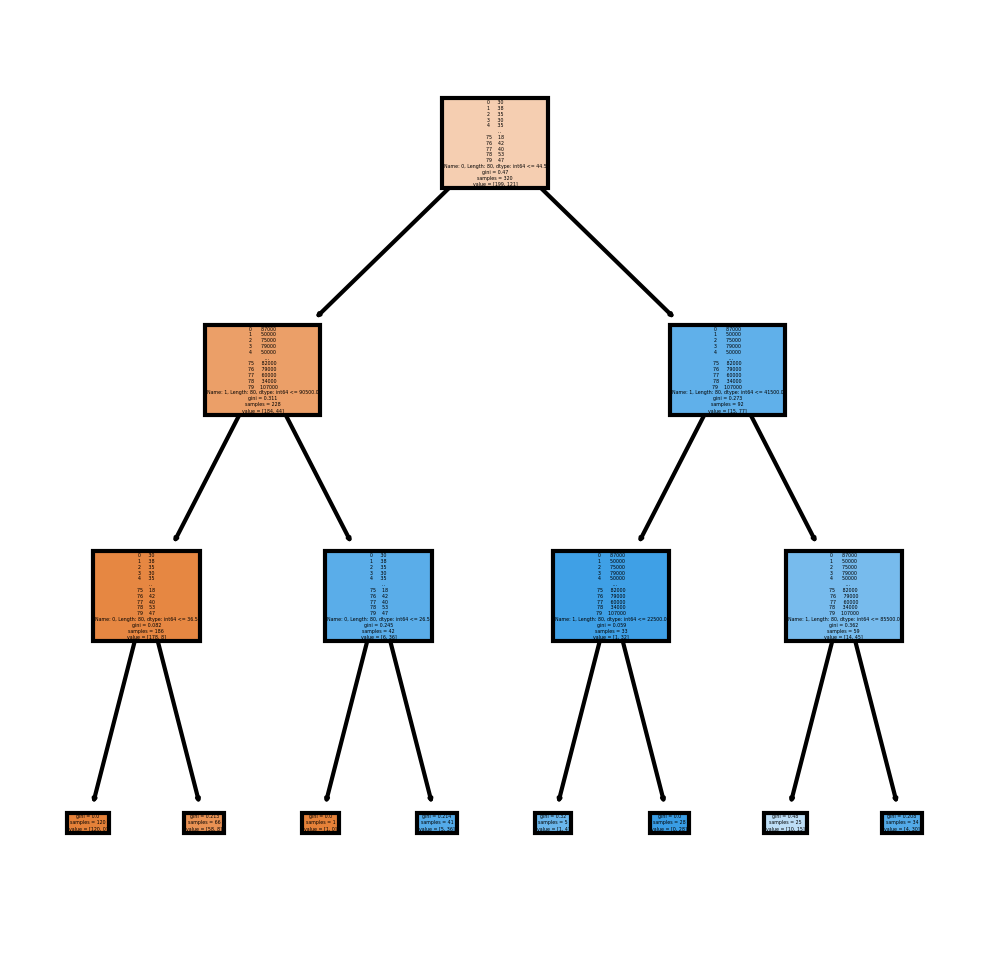

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names =pd.DataFrame(X_test),
               filled = True);
fig.savefig('imagename.png')